In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
filename = 'android-studio-data.csv'
studio_data = pd.read_csv(filename,header=None)
studio_data = studio_data.rename(columns={0:"app",1:"laptop",2:"step",3:"time"})
studio_data.index.names=['id']
studio_data

,app,laptop,step,time
id,,,,
0,Field Day,old,Sync at Studio Launch,64.736
1,Field Day,old,Build Not Install,4.705
2,Field Day,old,Build and Install on Device,59.349
3,Major Tom,old,Sync at Studio Launch,61.274
4,Major Tom,old,Build Not Install,2.674
5,Major Tom,old,Build and Install on Device,96.861
6,Field Day,new,Sync at Studio Launch,15.363
7,Field Day,new,Build Not Install,1.368
8,Field Day,new,Build and Install on Device,11.600


In [3]:
old_data = studio_data.loc[studio_data['laptop']=='old'].drop(columns='laptop')
new_data = studio_data.loc[studio_data['laptop']=='new'].drop(columns='laptop')

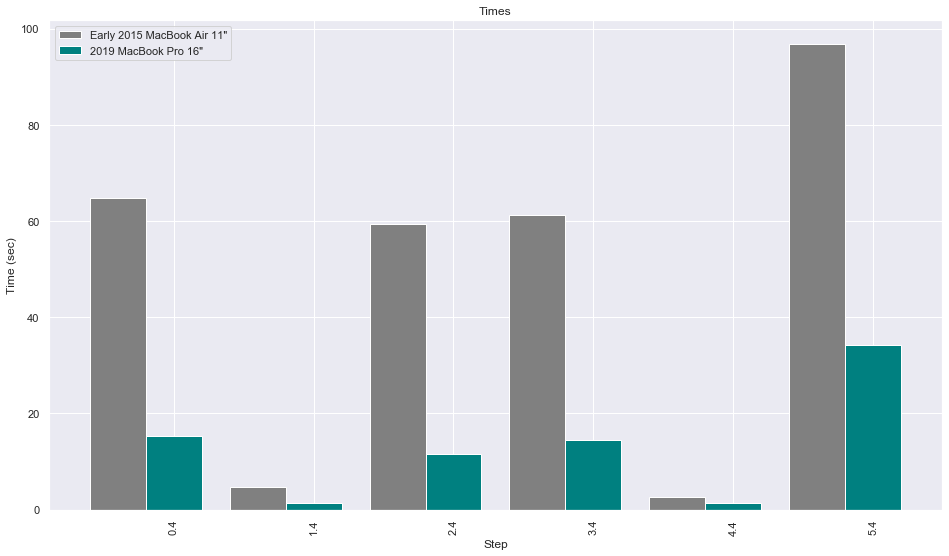

In [4]:
sns.set()

fig, ax = plt.subplots(figsize=(16,9))
index_new = new_data.index.values-6
index_old = old_data.index.values
bar_width = .4

bars_old = plt.bar(index_old, old_data['time'], bar_width, color='gray', label='Early 2015 MacBook Air 11\"')
bars_new = plt.bar(index_new + bar_width, new_data['time'], bar_width, color='teal', label='2019 MacBook Pro 16\"')

plt.xlabel('Step')
plt.ylabel('Time (sec)')
plt.title('Times')
plt.xticks(index_old + bar_width, rotation='vertical')
plt.legend()
plt.show()

To do
- use the step string rather than an arbitrary number as the tick marks on x axis
- better data model? maybe too small a dataset to bother (this was wrong, because of the number of ways I want to cut the data)

In [5]:
old_fieldday = studio_data[(studio_data.laptop=='old') & (studio_data.app=='Field Day')][['step','time']].reset_index(drop=True)
old_majortom = studio_data[(studio_data.laptop=='old') & (studio_data.app=='Major Tom')][['step','time']].reset_index(drop=True)
new_fieldday = studio_data[(studio_data.laptop=='new') & (studio_data.app=='Field Day')][['step','time']].reset_index(drop=True)
new_majortom = studio_data[(studio_data.laptop=='new') & (studio_data.app=='Major Tom')][['step','time']].reset_index(drop=True)

In [6]:
new_fieldday

,step,time
0,Sync at Studio Launch,15.363
1,Build Not Install,1.368
2,Build and Install on Device,11.600


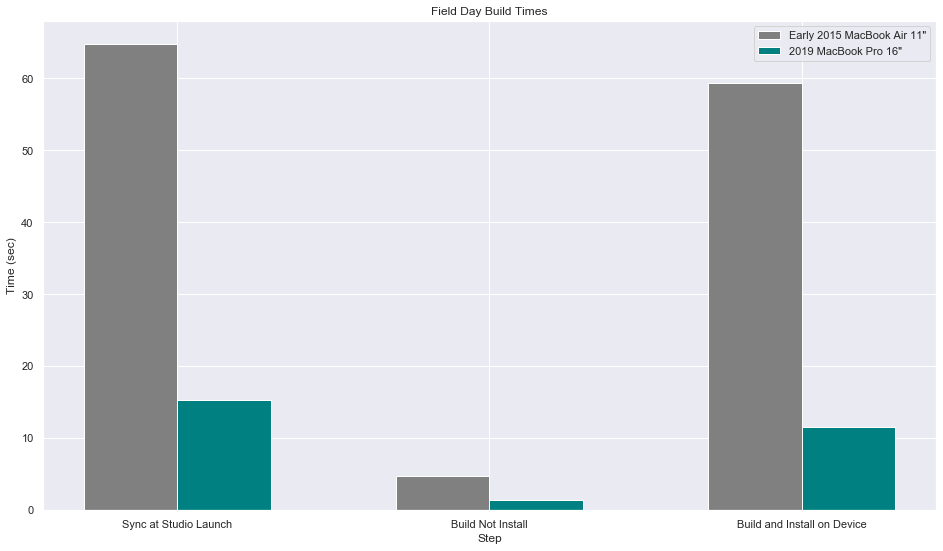

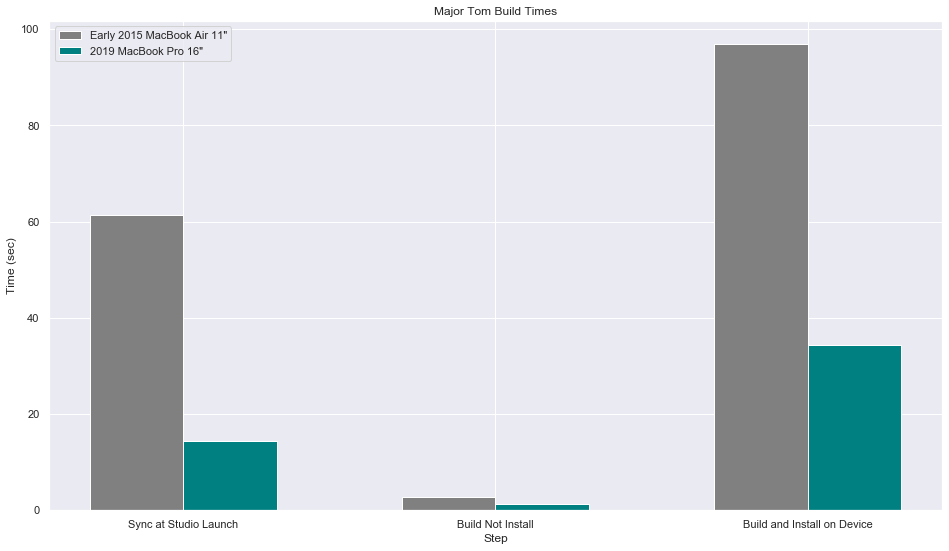

In [13]:
sns.set()

fig, ax = plt.subplots(figsize=(16,9))
index = new_fieldday.index
bar_width = 0.3

bars_old = plt.bar(index, old_fieldday['time'], bar_width, color='gray', label='Early 2015 MacBook Air 11\"')
bars_new = plt.bar(index + bar_width, new_fieldday['time'], bar_width, color='teal', label='2019 MacBook Pro 16\"')

plt.xlabel('Step')
plt.ylabel('Time (sec)')
plt.title('Field Day Build Times')
plt.xticks(index+0.5*bar_width, studio_data.step)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(16,9))
index = new_majortom.index
bar_width = 0.3

bars_old = plt.bar(index, old_majortom['time'], bar_width, color='gray', label='Early 2015 MacBook Air 11\"')
bars_new = plt.bar(index + bar_width, new_majortom['time'], bar_width, color='teal', label='2019 MacBook Pro 16\"')

plt.xlabel('Step')
plt.ylabel('Time (sec)')
plt.title('Major Tom Build Times')
plt.xticks(index+0.5*bar_width, studio_data.step)
plt.legend()
plt.show()